## Special Education Salary Analysis: An Investigation on the Grievances of Pasadena Protestors

According to an [article](https://www.pasadenanow.com/main/pasadena-teachers-union-members-rally-at-city-hall) posted in November 2023, Pasadena Teachers Union Members rallied at City Hall, advocating for salary increases and improvement in working conditions, particularly for Special Education (Special Ed) teachers. The United Teachers of Pasadena (UTP) president Jonathan Gardner made the claim that their teachers are not being compensated as much as comparable school districts in the surrounding area. This analysis will investigate Gardner's claims with a focus on the salaries of Special Education professionals.





## Part 1: Comparison of the average of Special Education salaries in Pasadena USD vs. the average of Special Education salaries of neighboring school districts

In [81]:
# import relevant libraries
import pandas as pd
import numpy as np
import os

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [82]:
# load csv tables of Pasadena Unified School District (PUSD) & surrounding district salaries
base_dir = "csvs"
for f in range(len(os.listdir(base_dir))):
    if f == 0:
        salary_data = pd.read_csv(os.path.join(base_dir, os.listdir(base_dir)[f]))
    else:
        salary_data = pd.concat([salary_data, pd.read_csv(os.path.join(base_dir, os.listdir(base_dir)[f]))])

salary_data

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status
0,Wendy K. Sinnette,Superintendent,148664.52,0.0,2333.84,36218.49,150998.36,187216.85,2022,NaN,La Canada Unified,NaN
1,Anais A. Wenn,"Assoc. Supt., Ed Services",108049.98,0.0,18493.42,30497.48,126543.40,157040.88,2022,NaN,La Canada Unified,NaN
2,Jamie L. Lewsadder,Chief Technology Officer,105931.50,0.0,18814.88,29334.89,124746.38,154081.27,2022,NaN,La Canada Unified,NaN
3,Debra L. Cradduck,Chief Human Resource,93670.98,0.0,20736.03,27116.79,114407.01,141523.80,2022,NaN,La Canada Unified,NaN
4,Karen M. Hurley,Executive Director,83871.72,0.0,11417.49,25635.60,95289.21,120924.81,2022,NaN,La Canada Unified,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4141,Ishac K. Tashjian,Not Provided,0.00,0.0,0.00,-762.00,0.00,-762.00,2022,NaN,Glendale Unified,NaN
4142,Nerses Abramyan,Not Provided,0.00,0.0,0.00,-926.00,0.00,-926.00,2022,NaN,Glendale Unified,NaN
4143,Diane Mathis Stokes,Not Provided,0.00,0.0,0.00,-926.00,0.00,-926.00,2022,NaN,Glendale Unified,NaN
4144,Yayone Areskurrinaga Tindol,Not Provided,0.00,0.0,0.00,-926.00,0.00,-926.00,2022,NaN,Glendale Unified,NaN


In [83]:
# make sure all the school districts of interest are in the dataset
districts = salary_data.groupby(by='Agency').count()["Employee Name"]
districts

Agency
Arcadia Unified            1524
Azusa Unified              1530
Duarte Unified              716
Glendale Unified           4146
La Canada Unified           665
Los Angeles Unified       97593
Monrovia Unified            985
Pasadena Unified           3000
San Gabriel Unified         870
San Marino Unified          484
South Pasadena Unified      799
Temple City Unified         758
Name: Employee Name, dtype: int64

**Selecting the districts of interest:** The claim that Pasadena educators are not being compensated similarly to other school districts was based on a comparison between Pasadena and "the closest ten comparable school districts in terms of size and location".  All of the districts included in the dataset are directly neighboring Pasadena School District, so we will assume their locations are all equally close. The article did not specify which districts, so we will narrow our analysis to the 10 school districts that are closest to Pasadena in size. Although number of students is probably a better measure of size, in this analysis, we will use the number of employees as our measure.

In [84]:
# determine which 10 school districts are closest to PUSD in size
pasadena_count = districts['Pasadena Unified']
PUSD_size_comp = abs(districts - pasadena_count).rename('PUSD compare')
districts_w_comp = pd.concat([districts, PUSD_size_comp],axis=1)
close_districts = districts_w_comp.sort_values(by='PUSD compare').iloc[:11, 0].index
close_districts_list = close_districts.tolist()
close_districts_list

['Pasadena Unified',
 'Glendale Unified',
 'Azusa Unified',
 'Arcadia Unified',
 'Monrovia Unified',
 'San Gabriel Unified',
 'South Pasadena Unified',
 'Temple City Unified',
 'Duarte Unified',
 'La Canada Unified',
 'San Marino Unified']

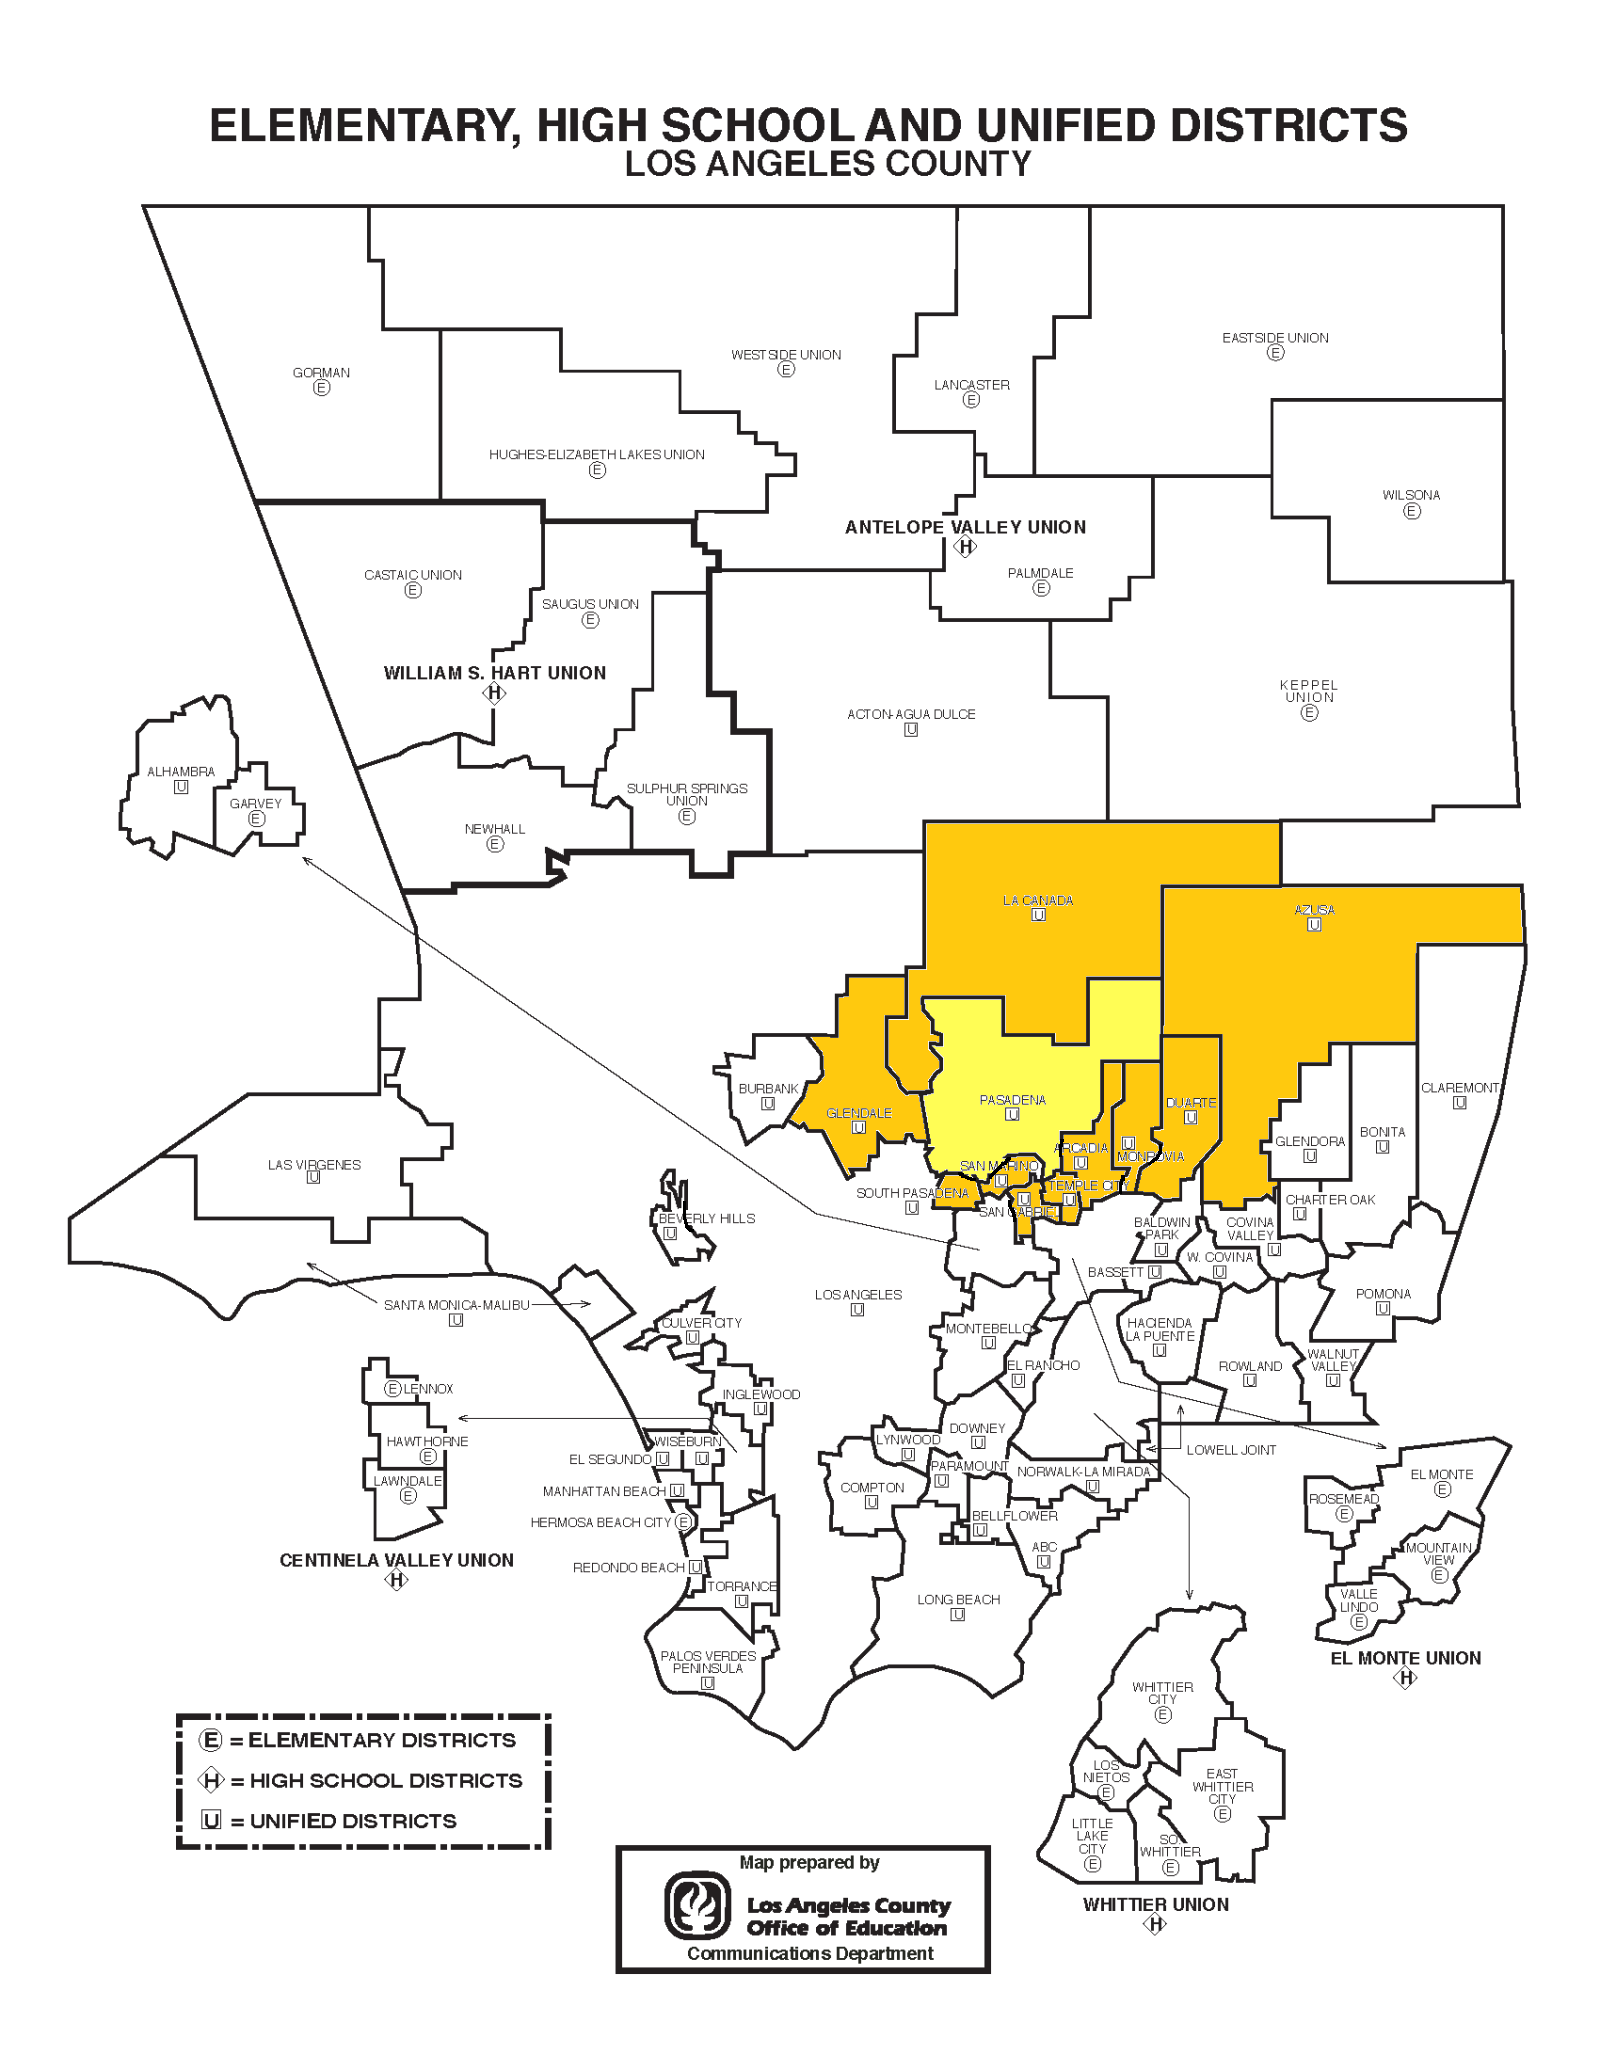

Now, we will limit our dataset to PUSD and the 10 school districts that were determined to be closest to PUSD in size.

In [85]:
salary_data = salary_data.loc[salary_data.Agency.isin(close_districts_list)]

For our analysis, we will look at data on 'Total Pay' and we will also be using the most recent dataset for each school district, which varied between 2022 and 2021. Future analysis can investigate the differences in pay with benefits in consideration and can also investigate whether or not year had an impact on differences in salaries.

In [86]:
# remove irrelevant columns.
salary_data = salary_data.drop(columns=['Employee Name', 'Base Pay', 'Overtime Pay', 'Other Pay', 'Benefits', 'Notes', 'Status','Total Pay & Benefits', 'Year'])
salary_data

,Job Title,Total Pay,Agency
0,Superintendent,150998.36,La Canada Unified
1,"Assoc. Supt., Ed Services",126543.40,La Canada Unified
2,Chief Technology Officer,124746.38,La Canada Unified
3,Chief Human Resource,114407.01,La Canada Unified
4,Executive Director,95289.21,La Canada Unified
...,...,...,...
4141,Not Provided,0.00,Glendale Unified
4142,Not Provided,0.00,Glendale Unified
4143,Not Provided,0.00,Glendale Unified
4144,Not Provided,0.00,Glendale Unified


**Selecting the employees of interest:** We will also limit our dataset to include only the salaries of individuals who work on a Special Education team, including: Special Education teachers, psychologists, speech-language pathologists, resource teachers, occupational therapists, and others.

First, we will create a list of all the different variations of job titles for the various jobs in Special Education. For example, we notice that although Speech-Language Pathologist is the same as a Language, Speech, and Hearing Specialist, they are registered under a different name depending on the district. We want to make sure that we include as many of these variations as possible in our dataset.

In [87]:
# note the different ways of saying "Speech-Language Pathologist" and "Speech-Language Pathologist Assistant" in the data set

salary_data[salary_data['Job Title'].str.contains('Speech')].groupby(by='Job Title').count()['Agency']

Job Title
Lang,Speech,Hearing Spec.                23
Speech & Lang Pathologist                11
Speech & Lang. Path. Asst                 2
Speech Lang Path Asst                     2
Speech Lang Patholog Asst                 3
Speech Lang. Path. Assist                 4
Speech Language Pathologist              13
Speech Language Pathologist Assistant     1
Speech Pathologist                        9
Speech-Lang Path Assist                  14
Name: Agency, dtype: int64

Based on domain-knowledge, we know that the major players on the Special Education team include: Psychologist, Special Day Class (SDC) Teacher, Speech-Language Pathologist (SLP), Occupational Therapist (OT), and Resource Specialist (RSP) Teacher. We will search for variations of these terms and the jobs related to those fields (e.g. "SLP Aide").

In [88]:
# create an array of title variations for each profession

psych = salary_data[salary_data['Job Title'].str.contains('Psych')].groupby('Job Title').count().index.tolist()

rsp_teacher = salary_data[salary_data['Job Title'].str.contains('Rsp')].groupby('Job Title').count().index.tolist()
other_rsp_names = ['Resource Specialist', 'Resource Teacher']
rsp = rsp_teacher + other_rsp_names

sdc_teacher = salary_data[salary_data['Job Title'].str.contains('Sdc')].groupby('Job Title').count().index.tolist()
other_sdc_names = salary_data[salary_data['Job Title'].str.contains('Spec Ed')].groupby('Job Title').count().index.tolist()
even_more_sdc_names = salary_data[salary_data['Job Title'].str.contains('Special Ed')].groupby('Job Title').count().index.tolist()
sdc = sdc_teacher + other_sdc_names + even_more_sdc_names

slp_names = salary_data[salary_data['Job Title'].str.contains('Speech')].groupby('Job Title').count().index.tolist()
more_speech_names = salary_data[salary_data['Job Title'].str.contains('Lang')].groupby('Job Title').count().index.tolist()
slp = slp_names + more_speech_names

ot = salary_data[salary_data['Job Title'].str.contains('Occ')].groupby('Job Title').count().index.tolist()

# now we will combine all the arrays of the job title variations
SpEd_profs = [psych, rsp, sdc, slp, ot]
SpEd_jobs = []
for educator in SpEd_profs:
  SpEd_jobs += educator

SpEd_jobs

['Dist Psychologist-Bcba',
 'Floating Sch Psychologist',
 'Hourly Psychologist',
 'Lead Psychologist',
 'Psych Intern',
 'Psych Intern Unclassified',
 'Psychological Ser Providr',
 'Psychologist',
 'School Psychologist',
 'Ss Psychologist',
 'Rsp Tchr / Ind',
 'Rsp Teacher',
 'Teacher - Rsp',
 'Teacher, Rsp-Eh Spec Ed',
 'Resource Specialist',
 'Resource Teacher',
 'Sdc Teacher',
 'Summer School Sdc Aide',
 'Teacher - Sdc',
 'Teacher, Sdc Spec Ed',
 'I A Spec Ed I',
 'I A-One On One-Spec Ed',
 'Inst Aide/Spec Ed',
 'Instr Aide- Spec Educ',
 'Program Admin, Spec Ed',
 'Spec Ed Teacher',
 'Sub I/A-Spec Ed',
 'Sumr Sch Spec Ed Teacher',
 'Teacher, Rsp-Eh Spec Ed',
 'Teacher, Sdc Spec Ed',
 'Coord I Special Ed',
 'Coord I,Special Education',
 'Coord Iii, Special Ed.',
 'Dir, Special Education',
 'Director - Special Educ',
 'Director Of Special Ed',
 'Director Of Special Ed.',
 'Director Of Special Educ',
 'Director Of Special Education',
 'Director, Special Ed',
 'Exec Dir, Special Ed',
 '

After looking through the list of title variations for Special Education professionals, we notice that the list includes administration jobs. We need to remove those individuals from the list since our analysis is only concerned with professionals who directly work with the students.

In [89]:
# create a list of all the names of admin positions in our Special Ed list
admin_jobs = []
admin = ['Dir', 'Coord', 'Admin']
for job in SpEd_jobs:
  for admin_name in admin:
    if admin_name in job:
      admin_jobs.append(job)

# create a new Special Ed list with admin positions removed
edited_SpEd_jobs = []
for job in SpEd_jobs:
  if job not in admin_jobs:
    edited_SpEd_jobs.append(job)

edited_SpEd_jobs

['Dist Psychologist-Bcba',
 'Floating Sch Psychologist',
 'Hourly Psychologist',
 'Lead Psychologist',
 'Psych Intern',
 'Psych Intern Unclassified',
 'Psychological Ser Providr',
 'Psychologist',
 'School Psychologist',
 'Ss Psychologist',
 'Rsp Tchr / Ind',
 'Rsp Teacher',
 'Teacher - Rsp',
 'Teacher, Rsp-Eh Spec Ed',
 'Resource Specialist',
 'Resource Teacher',
 'Sdc Teacher',
 'Summer School Sdc Aide',
 'Teacher - Sdc',
 'Teacher, Sdc Spec Ed',
 'I A Spec Ed I',
 'I A-One On One-Spec Ed',
 'Inst Aide/Spec Ed',
 'Instr Aide- Spec Educ',
 'Spec Ed Teacher',
 'Sub I/A-Spec Ed',
 'Sumr Sch Spec Ed Teacher',
 'Teacher, Rsp-Eh Spec Ed',
 'Teacher, Sdc Spec Ed',
 'Inst Aide Special Ed 1:1',
 'Inst Aide-Special Educ',
 'Inst Aide/Special Ed./I',
 'Inst Asst Iii-Special Ed',
 'Inst Asst Iv-Special Ed',
 'Inst Asst/Special Ed',
 'Inst.Aide Special Ed./Ii',
 'Inst.Aide Special Ed./Iii',
 'Instr Asst-Special Ed',
 'Instructional Assistant - Special Education',
 'Instructional Assistant - Speci

In [90]:
sped_salary_data = salary_data[salary_data['Job Title'].isin(edited_SpEd_jobs)]
sped_salary_data

,Job Title,Total Pay,Agency
13,School Psychologist,68276.16,La Canada Unified
15,School Psychologist,65452.02,La Canada Unified
27,School Psychologist,65452.02,La Canada Unified
29,School Psychologist,58449.36,La Canada Unified
94,Lead Occup. Therapist,52669.43,La Canada Unified
...,...,...,...
2693,"Teacher, Special Educ",19155.00,Glendale Unified
2734,"Teacher, Special Educ",19934.00,Glendale Unified
2904,"Lang,Speech,Hearing Spec.",11550.00,Glendale Unified
2944,"Teacher, Special Educ",12958.00,Glendale Unified


**Making sure that all the employees of interest are present in each district:** 

First, let's take a quick look at the Special Education positions in each of the districts.

In [91]:
# create a function that creates a list of the SpEd positions in one district
def list_jobs_in_district(district, salary_df):
    jobs_dist_list = salary_df[salary_df['Agency'] == district].groupby(by='Job Title').count()['Agency'].index.tolist()
    return jobs_dist_list

# create a dictionary containing Agency as keys and Sped jobs as values
district_jobs = {}
district_job_counts = {}
for dist in close_districts_list:
    district_jobs[dist] = list_jobs_in_district(dist, sped_salary_data)
    
    psych_count = 0
    rsp_count = 0
    sdc_count = 0
    slp_count = 0
    ot_count = 0
    for j in district_jobs[dist]:  # in the same loop, let's also get a count for each sped prof in each district
        if j in psych:
            psych_count += 1
        elif j in rsp:
            rsp_count += 1
        elif j in sdc:
            sdc_count += 1
        elif j in slp:
            slp_count += 1
        elif j in ot:
            ot_count += 1
    district_job_counts[dist] = [psych_count, rsp_count, sdc_count, slp_count, ot_count]

district_jobs

{'Pasadena Unified': ['Inst Aide-Special Educ',
  'Occupational Therap/Sp Ed',
  'Psychologist',
  'Resource Teacher',
  'Spch-Lang Pathology Asst',
  'Speech & Lang Pathologist',
  'Ss Psychologist',
  'Teacher-Special Ed'],
 'Glendale Unified': ['Lang,Speech,Hearing Spec.',
  'Occupational Therapist',
  'Psychological Ser Providr',
  'Psychologist',
  'Speech-Lang Path Assist',
  'Teacher, Special Educ'],
 'Azusa Unified': ['Dist Psychologist-Bcba',
  'Instr Aide- Spec Educ',
  'School Psychologist',
  'Teacher - Rsp',
  'Teacher - Sdc'],
 'Arcadia Unified': ['Instructional Assistant - Special Education',
  'Instructional Assistant - Special Education - Hourly',
  'Occupational Therapist',
  'Occupational Therapy Assistant',
  'Psychologist',
  'Speech Language Pathologist',
  'Speech Language Pathologist Assistant'],
 'Monrovia Unified': ['Inst Aide Special Ed 1:1',
  'Inst Aide/Spec Ed',
  'Instr Asst-Special Ed',
  'Occupational Therapist',
  'Psychologist',
  'Rsp Teacher',
  'Sd

Now let's ensure that each district has at least 1 listed job title for each of the promiment members of a Special Education team. 

In [92]:
# dataframe with the job counts collected in the for loop in the previous cell
job_count_cols = ['psych', 'rsp', 'sdc', 'slp', 'ot']
pd.DataFrame.from_dict(district_job_counts, orient='index', columns = job_count_cols)

,psych,rsp,sdc,slp,ot
Pasadena Unified,2,1,2,2,1
Glendale Unified,2,0,1,2,1
Azusa Unified,2,1,2,0,0
Arcadia Unified,1,0,2,2,2
Monrovia Unified,1,1,5,2,1
San Gabriel Unified,3,0,3,3,2
South Pasadena Unified,1,0,4,2,1
Temple City Unified,2,0,0,2,1
Duarte Unified,1,1,4,2,1
La Canada Unified,3,1,0,0,1


We see from this table that some districts are missing some important Special Education instructors. It is extremely unlikely that Glendale Unified doesn't have a single RSP teacher or that La Canada doesn't have an SDC teacher or SLP in the district. For that reason, let's take a closer look at all the job postings for the districts with missing roles.

First, let's take a look at Glendale, which is supposedly missing an RSP teacher....

In [93]:
# look at all the jobs in Glendale Unified
salary_data[salary_data['Agency'] == 'Glendale Unified'].groupby(by='Job Title').count()['Agency'].index.tolist()

['Account Clerk I',
 'Account Clerk Ii',
 'Account Clerk Iii',
 'Accounting Technician',
 'Admin Secretary, Confid.',
 'Admin:Nutr Serv&Cust Oper',
 'Admin:Plan,Dev,Inno&Facil',
 'Administrative Assistant',
 'Administrative Secretary',
 'Assist - Phys Handicapped',
 'Assist Dir Nutrition Srvs',
 'Assist Dir.Fac & Sup Serv',
 'Assist Director,Class Per',
 'Assist Director,Etis',
 'Assist.Operations Coord.',
 'Assistive Technology',
 'Asst Direct,Financial Svc',
 'Asst Supt, Educ Services',
 'Asst. Principal, Mid Sch',
 'Asst. Principal, Sr High',
 'Asst.Principal,Elementary',
 'Attendance Worker',
 'Auditorium Facil Supervsr',
 'Behavior Intrvention Asst',
 'Benefits Technician',
 'Board Member',
 'Bonds Controls Specialist',
 'Braille Transcriber',
 'Buyer',
 'Cafeteria Worker I',
 'Cafeteria Worker Ii',
 'Carpenter',
 'Case Manager',
 'Certificated Service Tech',
 'Chief Busin & Fin Officer',
 'Chief Counsel&Busi Operat',
 'Chief Financial Officer',
 'Chief Human Res&Oper Offi',
 'Cla

Looking through all the job positions at Glendale Unified, the job title that appears closest to RSP teacher or Resource Specialist teacher is 'Teacher Specialist'. Let's add this to our list of variations for RSP titles...

In [94]:
# add 'Teacher Specialist' to the list of RSP title variations
new_rsp = ['Teacher Specialist']
rsp += new_rsp

Now let's look at the other districts which are missing an RSP teacher. These districts include: Arcadia USD, San Gabriel USD, South Pasadena USD, and Temple City USD. 

In [95]:
# looking for RSP job titles in the list of all the jobs in Arcadia Unified
salary_data[salary_data['Agency'] == 'Arcadia Unified'].groupby(by='Job Title').count()['Agency'].index.tolist()

['Accounting Supervisor',
 'Accounting Technician',
 'Activities Assignment',
 'Activities Director - Tosa',
 'Administrative Assistant',
 'Administrative Information Technician',
 'Administrative Special Assignment - Substitute',
 'Advanced Maintenance Mechanic',
 'Advanced Maintenance Mechanic - Houlry',
 'Alternative Education Principal And Coordinator Of Student Services',
 'Asb Accounting Assistant',
 'Assistant Director Of Technology & Information Services',
 'Assistant Principal - Middle School',
 'Assistant Principal High School',
 'Assistant Superintendent - Business Services',
 'Assistant Superintendent - Education Services',
 'Assistant Superintendent - Human Resources',
 'Athletic Assistant',
 'Athletic Director - Tosa',
 'Athletic Facilities & Equipment Assistant',
 'Attendance Technician',
 'Board Member',
 'Business Specialist',
 'Campus Security Assistant',
 'Campus Security Assistant -Hourly',
 'Chief Communications Officer',
 'Chief Strategy & Innovation Officer',
 'C

In [96]:
# looking for RSP job titles in the list of all the jobs in San Gabriel Unified 
salary_data[salary_data['Agency'] == 'San Gabriel Unified'].groupby(by='Job Title').count()['Agency'].index.tolist()

['Account Clerk Iii',
 'Activities',
 'Admin Secy-Business Serv',
 'Admin Secy-Instr Serv',
 'Admin Secy-Personnel Serv',
 'Admin Sp Assign (Aosa)',
 'Assistant Superintendent',
 'Asst Prin 7-8',
 'Asst Prin Elementary',
 'Asst Principal High Sch',
 'Asst Supt Business Serv',
 'Athletic Field Maint Wkr',
 'Avid Curriculum Special',
 'Behavior Specialist,Sp Ed',
 'Behavioral Instruct Aide',
 'Benefits Tech',
 'Board Member',
 'Budget And Payroll Tech',
 'Campus Security',
 'Career Guidance Tech',
 'Cert Generic Addl Duties',
 'Cert Hrly Rop Teacher',
 'Cert Monthly Adapt Pe',
 'Cert Monthly Sp/Lang Path',
 'Class Coaches',
 'Class Misc Hourly',
 'Classroom Teacher',
 'Clerk Typist I',
 'Clerk Typist Ii',
 'Computer Support Tech',
 'Counselor',
 'Custodian',
 'Custodian Sub',
 'Database Specialist',
 'Database Specialist Asst',
 'Dir Of Facilities,Mnt&Ops',
 'Dir Of Fiscal Services',
 'Director Food Svcs',
 'Director Ii Of Pupil Pers',
 'Director Induction/Sp',
 'Director Of Language Svc

In [97]:
# looking for RSP job titles in the list of all jobs in South Pasadena Unified
salary_data[salary_data['Agency'] == 'South Pasadena Unified'].groupby(by='Job Title').count()['Agency'].index.tolist()

['Alt Lrn Prog Sec Spec',
 'Aquatics Facility Coord',
 'Assist. Supt. Of Business',
 'Asst Band Coach Hs Cl',
 'Asst Frsh Football/Cl',
 'Asst Jv Football/Cl',
 'Asst Principal, Sh',
 'Asst Principal,Middle Sch',
 'Asst Supt Human Resources',
 'Asst Supt Instruction Srv',
 'Asst Var Football/Cl',
 'Asst Vr Track/Cl',
 'Asst. Food Service Mang.',
 'Asst. Principal, Elem.',
 'Athletic Timr-Wkr/Cl',
 'Board Member',
 'Budget & Payroll Tech.',
 'Campus Supervisor',
 'Clerk Typist I',
 'Clerk Typist Ii',
 'Clerk Typist Iii',
 'Coach-Boosters-Cl',
 'Comm & Grant Specialist',
 'Coord Ed Tech/Curr/Asses',
 'Coord Health Services',
 'Coordinator E.L.O.P.',
 'Counselor',
 'Custodian',
 'Dirct Constr & Spec Proj',
 'Dirct Of Child Nutrition',
 'Director Facil & Maint',
 'Director Iii/Fiscal Servc',
 'Director Iii/Instr. Tech',
 'Director Of Extended Day',
 'Elem. Food Service Lead',
 'Exec Dir Stud Supt Servcs',
 'Executive Sec I',
 'Executive Sec Ii',
 'Ext Day Progrm Assistant',
 'Ext Day Progr

In [98]:
# looking for RSP and SDC job titles in the list of all jobs in Temple City Unified
salary_data[salary_data['Agency'] == 'Temple City Unified'].groupby(by='Job Title').count()['Agency'].index.tolist()

['Account Clerk Ii',
 'Accountant',
 'Acct Asst Ii',
 "Ass'T Principal Elem",
 "Ass'T Principal Int",
 "Ass'T Supt Business",
 "Ass'T Supt Personnel",
 'Associate Superintendent',
 'Asst Prin Special Assign',
 'Asst Principal Hs',
 'Asst Supt Instruction',
 'Athletic Director',
 'Behavior Interv Spec Bcba',
 'Behavior Intrv Aide',
 'Board Of Education Member',
 'Braillist',
 'Cafeteria Assistant I',
 'Cafeteria Assistant Ii',
 'Cafeteria Manager I',
 'Cafeteria Manager Ii',
 'Cafeteria Manager Iii',
 'Campus Security Monitor',
 'Certificated - Coach',
 'Chief Business Official',
 'Childcare Instructor I',
 'Childcare Instructor Ii',
 'Classified - Coach',
 'Classified - Extra Duty',
 'Clerk I',
 'Clerk Iii',
 'College/Career Tech',
 'Community Liaison',
 'Coord Of Health Services',
 'Coord Student Data & Tech',
 'Counselor',
 'Counselor Des Instr Serv',
 'Counselor Substitute',
 'Curriculum Coordinator',
 'Custodian Sub',
 'Delivery/Wh Worker',
 'Dir Ent Risk Mgmt',
 'Dir Of Fac Serv A

After looking through all the jobs in Arcadia USD, San Gabriel USD, South Pasadena USD, and Temple City USD, we find the following:
* Arcadia USD is not only missing the salaries of RSP teachers, but they are missing the salaries of Special Day Class teachers as well (though they listed the salaries of the Instructional Assistants working in Special Education). Could they have lumped general education (Gen Ed) teachers with these special education teachers under the title 'Teacher'?
* San Gabriel USD also does not have a specific title for SDC teachers and RSP teachers. Were these teachers categorized very broadly as 'Classroom Teacher'? This appears to be the case with Temple City USD as well.
* In the case of South Pasadena USD, we notice that there is also no designated title for SDC and RSP teachers. However, we see that there is a position 'Spec Ed Teacher', which may be the umbrella term for both SDC and RSP teachers.

However, in the case of South Pasadena USD, it is more difficult to separate RSP and SDC salaries from each other given that they typically have similar salaries. For now, we will assume that South Pasadena does indeed have both SDC and RSP teacher salaries listed in the dataset, though they have not made distinct categories for them.

In the case of Arcadia USD, San Gabriel USD and Temple City USD, we need to look at the distribution of the teacher salaries, because we know that Gen Ed teachers are typically paid less than Special Ed teachers. If we see a bimodal distribution with curves that are distinct enough, perhaps we might be able to infer the range of salaries for the Special Education teachers (specifically RSP and SDC) in these distributions. 

array([[<AxesSubplot:title={'center':'Teacher Salaries'}>]], dtype=object)

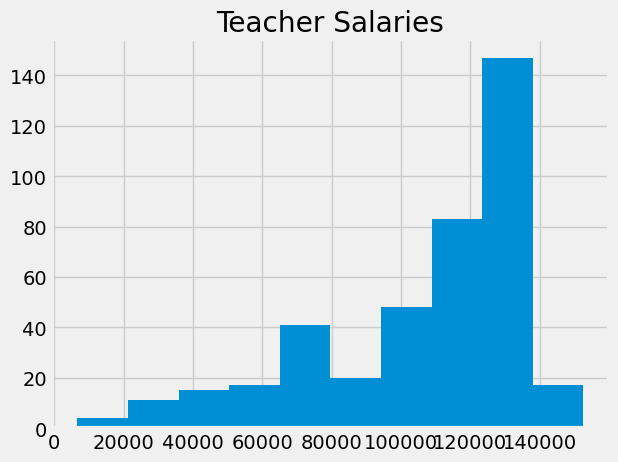

In [99]:
# visualize 'Teacher' salaries in Arcadia USD
ArcUSD_tchr_salary = salary_data[(salary_data['Agency'] == 'Arcadia Unified') & (salary_data['Job Title'] == 'Teacher')]
ArcUSD_tchr_salary_df = pd.DataFrame()
ArcUSD_tchr_salary_df['Teacher Salaries'] = ArcUSD_tchr_salary['Total Pay']
ArcUSD_tchr_salary_df.hist()

array([[<AxesSubplot:title={'center':'Teacher Salaries'}>]], dtype=object)

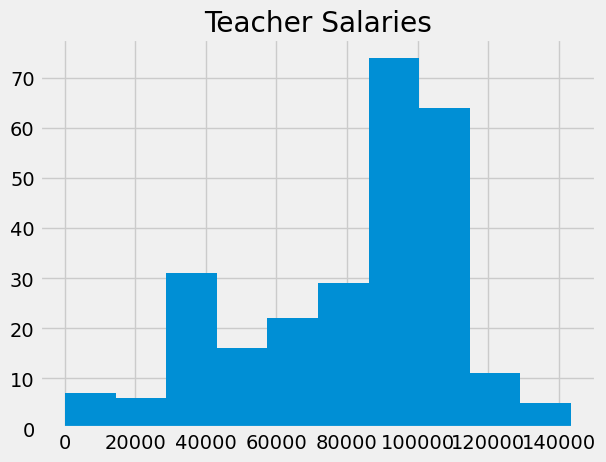

In [100]:
# visualize 'Classroom Teacher' salaries in San Gabriel USD
SGUSD_tchr_salary = salary_data[(salary_data['Agency'] == 'San Gabriel Unified') & (salary_data['Job Title'] == 'Classroom Teacher')]
SGUSD_tchr_salary_df = pd.DataFrame()
SGUSD_tchr_salary_df['Teacher Salaries'] = SGUSD_tchr_salary['Total Pay']
SGUSD_tchr_salary_df.hist()

array([[<AxesSubplot:title={'center':'Teacher Salaries'}>]], dtype=object)

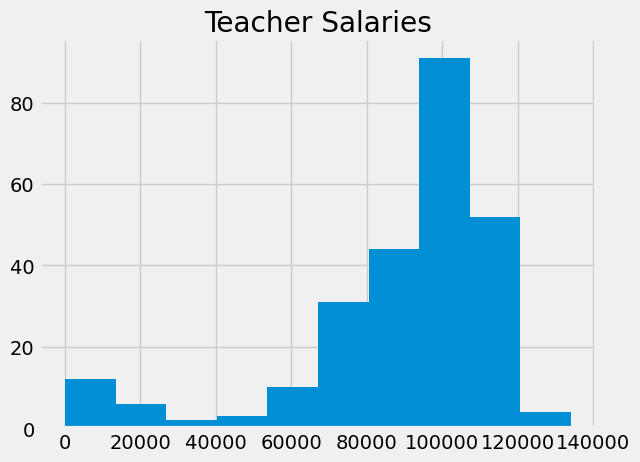

In [101]:
# visualize 'Teacher' salaries in Temple City USD
TCUSD_tchr_salary = salary_data[(salary_data['Agency'] == 'Temple City Unified') & (salary_data['Job Title'] == 'Teacher')]
TCUSD_tchr_salary_df = pd.DataFrame()
TCUSD_tchr_salary_df['Teacher Salaries'] = TCUSD_tchr_salary['Total Pay']
TCUSD_tchr_salary_df.hist()

After looking through the distributions, there does not appear to be a clear bimodal distribution. For that reason, we will have to interpret the results of this analysis with the caveat that Arcadia USD, San Gabriel USD, and Temple City USD do not include RSP or SDC teacher salaries in the dataset.

Next, let's investigate the districts which are missing speech language-pathologists: La Canada USD (also missing SDC) and Azusa USD (also missing OT).

In [102]:
# looking for SLP and SDC job titles in the list of all jobs in La Canada Unified
salary_data[salary_data['Agency'] == 'La Canada Unified'].groupby(by='Job Title').count()['Agency'].index.tolist()

['7/8 Principal',
 '9-12 Hs Princ Secretary',
 'Accounting Tech',
 'Administrative Secretary',
 'Asb/Lchs Accoun',
 'Assoc. Supt., Bus & Adm',
 'Assoc. Supt., Ed Services',
 'Asst.Supt. Bus.',
 'Auditorium Tech',
 'Campus Aide',
 'Campus Security 7-12',
 'Chief Human Resource',
 'Chief Technology Officer',
 'Classified Hour',
 'Classified Subs',
 'Classified/Read',
 'Clsrm Tchr',
 'Clsrm Tchr (Dis',
 'Clsrm Tchr (Res',
 'Clsrm Tchr (Spe',
 'Clsrm Teacher H',
 'Comm Coordin/Asst To Superintendent',
 'Counselor',
 'Custodian',
 'Data Specialist',
 'Dir Of Fiscal Services',
 'Director Of Facility',
 'Dis-W Hrly Spch',
 'Dist. Wide Secretary',
 'District Nurse-',
 'District Registrar',
 'District Wide Floor',
 'District Wide Secretary',
 'E.Y./Non-Sev Cl',
 'E.Y./Non-Sev Classroom Tchr',
 'E.Y./Para Ii',
 'E.Y./Sev-Hand C',
 'Eld Teacher',
 'Elem Health Office Clerk',
 'Elem Prin Sec-Office Mgr',
 'Elementary Principal',
 'Executive Director',
 'Floating Sch Psychologist',
 'Food Service C

In the list of jobs in La Canada Unified, we notice that they have listed 'Clsrm Tchr (Dis' and 'Clsrm Tchr (Spe'. 
* When a student receives speech services from an SLP, these services are often categorized as Designated Instruction and Services (DIS). For that reason, in our analysis, let's assume that 'Clsrm Tchr (Dis' is referring to a speech-language pathologist given that speech services are generally the most common DIS service. However, it's important to note that there may be other professionals who offer DIS services, such as Adaptive Physical Education and Audiological Services.
* In this analysis, let's assume that 'Clsrm Tchr (Spe' is referring to a Special Day Class teacher. 

In [103]:
# looking for SLP and OT job titles in the list of all jobs in Azusa Unified
salary_data[salary_data['Agency'] == 'Azusa Unified'].groupby(by='Job Title').count()['Agency'].index.tolist()

['7-8 Student Body Clerk',
 'Account Clerk 3',
 'Administrative Secretary',
 'Administrator-Spec Assign',
 'Adult Ed Coodinator',
 'Asst Dir Nutrition Svcs',
 'Asst Principal 9-12',
 'Asst Principal-Middle Sch',
 'Asst Supt Business Svs',
 'Asst Supt Secretary',
 'Asst. Director-Fiscalsvcs',
 'Asst. Superintendent K-12',
 'Asst.Dir Adult Education',
 'Asst.Supt-Business Serv',
 'Asst.Textbk Warehouse Kpr',
 'Athletic & P.E. Aide',
 'Athletic Asb Support-Clas',
 'Avid Tutor',
 'Board Member',
 'Braille Transcriber',
 'Bus Driver',
 'Bus Driver/Dispatcher',
 'Buyer',
 'Campus Aide',
 'Career Center Technician',
 'Central Kitchen Manager',
 'Coach, Classified',
 'Communications Specialist',
 'Community Aide-Bilingual',
 'Community Liaison Aide',
 'Computer Lab Aide Ii-Ae',
 'Coordinator El Programs',
 'Coordntr Sp Ed & Pupil Se',
 'Counselor',
 'Custodial Supervisor',
 'Custodian',
 'Data Entry Clerk',
 'Data Technician',
 'Dir College & Career Path',
 'Dir Comm/Comm Engagement',
 'Dir Hu

Although the list of jobs in Azusa Unified is missing SLP and OT, we see that they have a position titled "Teacher - Dis". As mentioned before, DIS service providers include speech-therapists and also occupational therapists. 

Now let's re-check that all of the special education instructors are counted for. First, we need to update our SpEd salary dataset

In [104]:
# new category called Dis for DIS service providers (e.g. SLP, OT)
dis = ['Teacher - Dis', 'Clsrm Tchr (Dis']

# add new sdc teacher name variation to the list
new_sdc = ['Clsrm Tchr (Spe']
sdc += new_sdc

# update list of SpEd jobs
edited_SpEd_jobs += dis + new_sdc + new_rsp

# update sped_salary_data
sped_salary_data = salary_data[salary_data['Job Title'].isin(edited_SpEd_jobs)]
sped_salary_data

,Job Title,Total Pay,Agency
13,School Psychologist,68276.16,La Canada Unified
15,School Psychologist,65452.02,La Canada Unified
22,Clsrm Tchr (Dis,62159.58,La Canada Unified
27,School Psychologist,65452.02,La Canada Unified
29,School Psychologist,58449.36,La Canada Unified
...,...,...,...
2734,"Teacher, Special Educ",19934.00,Glendale Unified
2815,Teacher Specialist,14790.00,Glendale Unified
2904,"Lang,Speech,Hearing Spec.",11550.00,Glendale Unified
2944,"Teacher, Special Educ",12958.00,Glendale Unified


In [105]:
# create a dictionary containing Agency as keys and Sped jobs as values
dbl_check_district_jobs = {}
dbl_check_district_job_counts = {}
for dist in close_districts_list:
    dbl_check_district_jobs[dist] = list_jobs_in_district(dist, sped_salary_data)
    
    new_psych_count = 0
    new_rsp_count = 0
    new_sdc_count = 0
    new_slp_count = 0
    new_ot_count = 0
    for j in dbl_check_district_jobs[dist]:  # in the same loop, let's also get a count for each sped prof in each district
        if (j == 'Spec Ed Teacher') and (dist == 'South Pasadena Unified'):
            new_rsp_count += 1
        elif j in psych:
            new_psych_count += 1
        elif j in rsp:
            new_rsp_count += 1
        elif j in sdc:
            new_sdc_count += 1
        elif j in slp:
            new_slp_count += 1
        elif j in ot:
            new_ot_count += 1
        elif j in dis:
            new_slp_count += 1
            new_ot_count += 1
    dbl_check_district_job_counts[dist] = [new_psych_count, new_rsp_count, new_sdc_count, new_slp_count, new_ot_count]

dbl_check_district_jobs

{'Pasadena Unified': ['Inst Aide-Special Educ',
  'Occupational Therap/Sp Ed',
  'Psychologist',
  'Resource Teacher',
  'Spch-Lang Pathology Asst',
  'Speech & Lang Pathologist',
  'Ss Psychologist',
  'Teacher-Special Ed'],
 'Glendale Unified': ['Lang,Speech,Hearing Spec.',
  'Occupational Therapist',
  'Psychological Ser Providr',
  'Psychologist',
  'Speech-Lang Path Assist',
  'Teacher Specialist',
  'Teacher, Special Educ'],
 'Azusa Unified': ['Dist Psychologist-Bcba',
  'Instr Aide- Spec Educ',
  'School Psychologist',
  'Teacher - Dis',
  'Teacher - Rsp',
  'Teacher - Sdc'],
 'Arcadia Unified': ['Instructional Assistant - Special Education',
  'Instructional Assistant - Special Education - Hourly',
  'Occupational Therapist',
  'Occupational Therapy Assistant',
  'Psychologist',
  'Speech Language Pathologist',
  'Speech Language Pathologist Assistant'],
 'Monrovia Unified': ['Inst Aide Special Ed 1:1',
  'Inst Aide/Spec Ed',
  'Instr Asst-Special Ed',
  'Occupational Therapist

In [106]:
# dataframe with new job counts collected in the for loop in the previous cell
job_count_cols = ['psych', 'rsp', 'sdc', 'slp', 'ot']
pd.DataFrame.from_dict(dbl_check_district_job_counts, orient='index', columns = job_count_cols)

,psych,rsp,sdc,slp,ot
Pasadena Unified,2,1,2,2,1
Glendale Unified,2,1,1,2,1
Azusa Unified,2,1,2,1,1
Arcadia Unified,1,0,2,2,2
Monrovia Unified,1,1,5,2,1
San Gabriel Unified,3,0,3,3,2
South Pasadena Unified,1,1,3,2,1
Temple City Unified,2,0,0,2,1
Duarte Unified,1,1,4,2,1
La Canada Unified,3,1,1,1,2


Now we have verified that all districts (except for Arcadia USD, San Gabriel USD, and Temple City USD) have all Special Ed instructors accounted for in our dataset. As we continue our analysis, let's continue to bear in mind that the aforementioned districts are missing two large categories of SpEd job positions due to the fact that they grouped the Special Ed teachers with the Gen Ed teachers.

**Creating our groups:** In this analysis, we will be performing an A/B test with our A group as 'Pasadena' and our B group as 'Not Pasadena'. Let's create a new column with these labels.  

In [107]:
# create a function that labels whether or not the district is Pasadena
def is_Pasadena(name):
  if name == 'Pasadena Unified':
    return True
  else:
    return False

# create a Series with is_Pasadena labels
pasadena_labels = sped_salary_data['Agency'].apply(is_Pasadena).rename("is_PUSD")

# add is_Pasadena labels to sped_salary_higher_min_wage
sped_salary_data = pd.concat([sped_salary_data, pasadena_labels], axis = 1)
sped_salary_data

,Job Title,Total Pay,Agency,is_PUSD
13,School Psychologist,68276.16,La Canada Unified,False
15,School Psychologist,65452.02,La Canada Unified,False
22,Clsrm Tchr (Dis,62159.58,La Canada Unified,False
27,School Psychologist,65452.02,La Canada Unified,False
29,School Psychologist,58449.36,La Canada Unified,False
...,...,...,...,...
2734,"Teacher, Special Educ",19934.00,Glendale Unified,False
2815,Teacher Specialist,14790.00,Glendale Unified,False
2904,"Lang,Speech,Hearing Spec.",11550.00,Glendale Unified,False
2944,"Teacher, Special Educ",12958.00,Glendale Unified,False


**Setting a minimum salary:** Looking through the Total Pay column in our dataset of Special Education salaries, we see that the minimum pay is \\$0. We will try to limit our dataset to only include those who worked full time. Minimum wage in California in the year 2021 was \\$14. Let's determine what is the minimum salary that we will include in our dataset then remove any salaries lower than that minimum.

In [108]:
min_wage = 14
hours_per_week = 40
weeks_per_year = 52
min_salary = min_wage * hours_per_week * weeks_per_year

sped_salary_above_min_wage = sped_salary_data[sped_salary_data['Total Pay'] >= min_salary]
sped_salary_above_min_wage

,Job Title,Total Pay,Agency,is_PUSD
13,School Psychologist,68276.16,La Canada Unified,False
15,School Psychologist,65452.02,La Canada Unified,False
22,Clsrm Tchr (Dis,62159.58,La Canada Unified,False
27,School Psychologist,65452.02,La Canada Unified,False
29,School Psychologist,58449.36,La Canada Unified,False
...,...,...,...,...
2365,"Teacher, Special Educ",30663.00,Glendale Unified,False
2376,Speech-Lang Path Assist,32358.00,Glendale Unified,False
2380,"Teacher, Special Educ",33381.00,Glendale Unified,False
2383,Psychologist,30038.00,Glendale Unified,False


**Performing A/B Test:** Now, after organizing the data, let's perform A/B testing and see if Pasadena special education teachers are being paid significantly less on average than special education teachers in other school districts. We will be testing the following hypotheses:
* Null: Special Educators in PUSD get paid as much on average as the Special Educators in the neighboring school districts.
* Alternate: Special Educators in PUSD get paid less on average than the Special Educators in the neighboring school districts.

First, let's see what the observed difference in total pay between Pasadena and Not Pasadena school districts.

In [109]:
## function that performs A/B testing
#param: table, pay column, agency

def difference_of_means(table, pay_label, group_label):
  '''Takes: name of DataFrame, column label for pay, column label for group
  Returns: difference of means of two groups'''

  # dataframe with the two relevant columns
  reduced = table[[pay_label, group_label]]

  # dataframe containing group means
  means_table = reduced.groupby(group_label).mean()
  # series of group means
  means = means_table[pay_label]

  # this returns Pasadena - Not Pasadena difference
  return means[means.index == True].values[0] - means[means.index == False].values[0]

observed_difference = difference_of_means(sped_salary_above_min_wage, 'Total Pay', 'is_PUSD')

if observed_difference < 0:
  print(f"Pasadena USD salary average is {np.round(abs(observed_difference), 2)} less than the average salary across other non-Pasadena districts.")
else:
  print(f"Pasadena USD salary average is {np.round(abs(observed_difference), 2)} more than the average salary across other non_Pasadena districts.")



Pasadena USD salary average is 4389.53 less than the average salary across other non-Pasadena districts.


Based on our dataset, the observed difference supports Pasadena USD teacher claims that their Special Education professionals are being paid less than the educators in surrounding districts. However, we should determine the significance of this observed difference by conducting an A/B test.

In [110]:
# creates a function that simulates a difference in average salary

def one_simulated_difference(table, pay_label, group_label):
  """Param: name of table, column of pay label, group-label variable
  Returns: difference of means of groups after shuffling labels"""

  # array of shuffled labels
  shuffled_labels = table.sample(replace=False, frac=1)[group_label].values

  # series of the total pay salaries from original table
  pay_series = table[pay_label].values

  #create dataframe with shuffled labels
  shuffled_df = pd.DataFrame()
  shuffled_df['shuffled_labels'] = shuffled_labels
  shuffled_df['pay'] = pay_series

  return difference_of_means(shuffled_df, 'pay', 'shuffled_labels')


one_simulated_difference(sped_salary_above_min_wage, 'Total Pay', 'is_PUSD')

2697.398963481639

Our observed difference -4389.53 is plotted at the red dot.


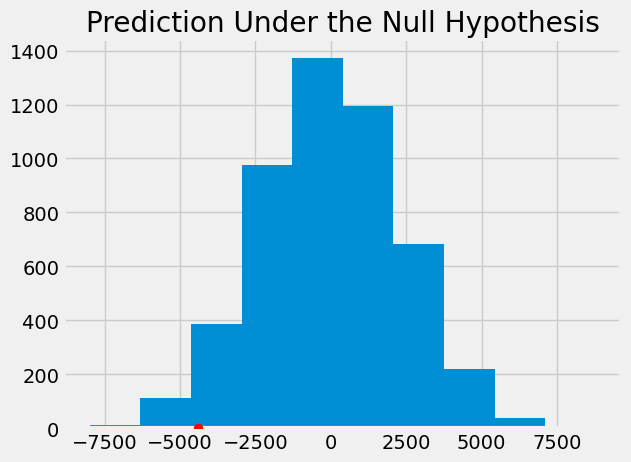

In [111]:
# create a function that creates a list of simulated differences
def simulate_differences(dataframe, pay_column, group_label, repetitions):
  '''Takes: dataframe, name of pay column, column name w group labels, number of simulation
  Returns: list of simulated differences'''
  sim_diffs = []
  for i in np.arange(repetitions):
    sim_diff = one_simulated_difference(dataframe, pay_column, group_label)
    sim_diffs.append(sim_diff)
  return sim_diffs

# simulate 5000 times to create a distribution of simulated differences
repetitions = 5000
differences = simulate_differences(sped_salary_above_min_wage, 'Total Pay', 'is_PUSD', repetitions)

# plot our simulated values and the observed values
diffs_df = pd.DataFrame()
diffs_df['Differences Between Group Means'] = differences
diffs_df.hist()
plots.scatter(observed_difference, 0, color='red', s=40, zorder=3)
plots.title('Prediction Under the Null Hypothesis');

print(f"Our observed difference {np.round(observed_difference, 2)} is plotted at the red dot.")


From our distribution, let's determine if our observed difference is statistically significant, with a p-value cut-off set at 0.05.

In [112]:
# create a function for calculating p-value
def calc_p(sim_measures, observed, repetitions):
  '''Takes: an array of simulated measures, the observed measure,
  and the number of repetitions
  Returns: p-value'''
  return np.count_nonzero(sim_measures < observed) / repetitions

# create a function to determine if data favors alternative hypothesis and its statistical significance
def accept_alternative_hyp(obs_diff, p_val):
  '''Takes: the observed difference btwn non-PUSD salary and PUSD salary and p-value
  Returns: two booleans, first stating if we accept alternative hypothesis, second stating if it's statistically significant'''
  if obs_diff < 0:
    alt_hyp = True
    if p_val < 0.05:
      statistically_significant = True
    else:
      statistically_significant = False
  else:
    alt_hyp = False
    if p_val > 0.95:
      statistically_significant = True
    else:
      statistically_significant = False
  return alt_hyp, statistically_significant

p_val = calc_p(differences, observed_difference, repetitions)
part1_result = accept_alternative_hyp(observed_difference, p_val)
print(f"The data suggests that the alternative hypothesis is {part1_result[0]}.")
if part1_result[1] == True:
    print(f"The result is statistically significant with a p-value of {p_val}")
else:
    print(f"The result is not statistically significant with a p-value of {p_val}")

The data suggests that the alternative hypothesis is True.
The result is statistically significant with a p-value of 0.032


Our analysis indicate that Pasadena USD educators in Special Education earn significantly less than the Special Education instructors in neighboring districts on average.  

### Part 2: Comparison of the average of Special Education salaries in Pasadena USD vs. the average of Special Education salaries of *each* of the neighboring school districts

In our first analysis, we investigated whether or not special education instructors in Pasadena USD are making significantly less than instructors in non-Pasadena school districts as a whole. Our results indicate that Pasadena USD special education salaries are significantly lower than those in neighboring districts.

In this part of the analysis, we will investigate *which* of the neighboring districts are earning significantly more and which are earning significantly less than Pasadena USD.
For example, are the special education instructors in San Marino making more than the instructors in Pasadena? What about in Azusa?

In [113]:
# create an array of all comparable districts neighboring Pasadena
non_PUSD_districts = [x for x in close_districts if x != "Pasadena Unified"]
non_PUSD_districts

['Glendale Unified',
 'Azusa Unified',
 'Arcadia Unified',
 'Monrovia Unified',
 'San Gabriel Unified',
 'South Pasadena Unified',
 'Temple City Unified',
 'Duarte Unified',
 'La Canada Unified',
 'San Marino Unified']

In [114]:
# collect the statistics for each of the district comparisons w PUSD
sim_diffs_btwn_districts = {}
district_conclusions = {}

for district in non_PUSD_districts:
  # creates a dataframe with only one non-PUSD districts and PUSD
  compare_districts_df = sped_salary_above_min_wage[sped_salary_above_min_wage['Agency'].isin([district, 'Pasadena Unified'])]

  # adds to the list of observed test statistics for the non-PUSD districts
  obs_diff_btwn_districts = difference_of_means(compare_districts_df, 'Total Pay', 'is_PUSD')
  district_conclusions[district] = [obs_diff_btwn_districts]

  # adds simulated difference values to the sim_diffs dictionary
  num_of_simulations = 5000
  one_sim_diff_in_district = simulate_differences(compare_districts_df, 'Total Pay', 'is_PUSD', num_of_simulations)
  sim_diffs_btwn_districts[district] = one_sim_diff_in_district

  # adds p-values to district_p_vals dictionary
  one_district_p_val = calc_p(one_sim_diff_in_district, obs_diff_btwn_districts, repetitions)
  district_conclusions[district] += [one_district_p_val]

  # adds alt hypothesis and stat sig decisions to district_conclusions dictionary
  one_district_alt_hyp = accept_alternative_hyp(obs_diff_btwn_districts, one_district_p_val)
  district_conclusions[district] += [one_district_alt_hyp[0]]
  district_conclusions[district] += [one_district_alt_hyp[1]]

district_conclusions

{'Glendale Unified': [-15001.289517589248, 0.0, True, True],
 'Azusa Unified': [-12371.80940725244, 0.0, True, True],
 'Arcadia Unified': [13536.347644029614, 0.9996, False, True],
 'Monrovia Unified': [1549.1191268841212, 0.656, False, False],
 'San Gabriel Unified': [19463.069532141504, 0.9998, False, True],
 'South Pasadena Unified': [-421.0177405857685, 0.4766, True, False],
 'Temple City Unified': [5474.378926080899, 0.733, False, False],
 'Duarte Unified': [-2423.037348428901, 0.3068, True, False],
 'La Canada Unified': [20672.73100941423, 0.9988, False, True],
 'San Marino Unified': [-10573.760240585776, 0.0864, True, False]}

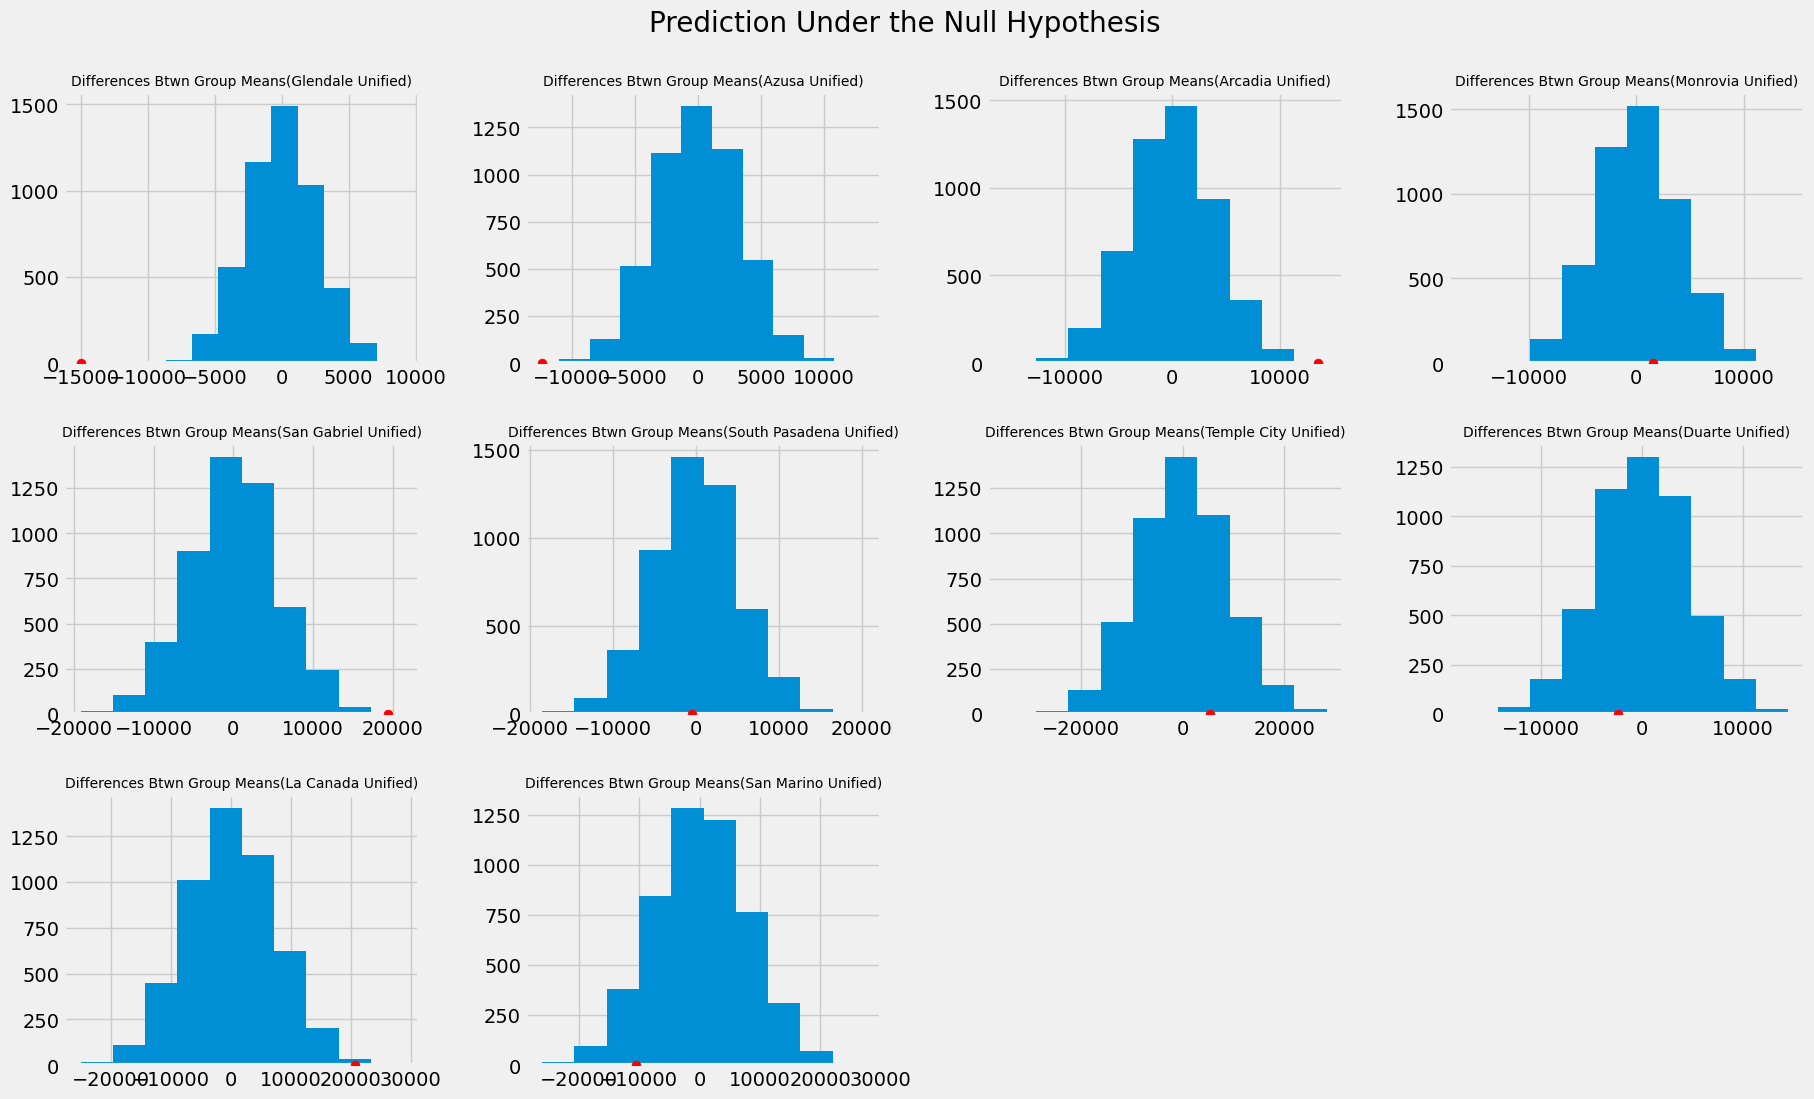

In [115]:
# plot the results of the A/B tests btwn each of the non-PUSD districts and PUSD

plots.figure(figsize=(20,12))
plots.subplots_adjust(hspace=0.5, wspace=0.5)
plots.suptitle("Prediction Under the Null Hypothesis", fontsize=20, y=0.95)

for n in range(len(sim_diffs_btwn_districts)):
  # add a new subplot iteratively
  ax = plots.subplot(3, 4, n+1)
  district_hist_df = pd.DataFrame()
  district_hist_df[f'Differences Btwn Group Means({non_PUSD_districts[n]})'] = sim_diffs_btwn_districts[non_PUSD_districts[n]]
  district_hist_df.hist(ax=ax)
  plots.scatter(district_conclusions[f'{non_PUSD_districts[n]}'][0], 0, color='red', s=40, zorder=3)
  ax.title.set_size(10)

In [116]:
district_result_cols = ['Salary_Difference', 'p-value','Favors_Alt_Hyp', 'Is_Stat_Sig' ]
compare_to_PUSD_by_district_df = pd.DataFrame.from_dict(district_conclusions, orient='index', columns=district_result_cols)
compare_to_PUSD_by_district_df

,Salary_Difference,p-value,Favors_Alt_Hyp,Is_Stat_Sig
Glendale Unified,-15001.289518,0.0000,True,True
Azusa Unified,-12371.809407,0.0000,True,True
Arcadia Unified,13536.347644,0.9996,False,True
Monrovia Unified,1549.119127,0.6560,False,False
San Gabriel Unified,19463.069532,0.9998,False,True
South Pasadena Unified,-421.017741,0.4766,True,False
Temple City Unified,5474.378926,0.7330,False,False
Duarte Unified,-2423.037348,0.3068,True,False
La Canada Unified,20672.731009,0.9988,False,True
San Marino Unified,-10573.760241,0.0864,True,False


In [117]:
# determine which school districts have special education salaries that are significantly higher than Pasadena USD's.
sig_higher_than_PUSD_district = compare_to_PUSD_by_district_df.loc[(compare_to_PUSD_by_district_df.Favors_Alt_Hyp == True) & (compare_to_PUSD_by_district_df.Is_Stat_Sig == True)].index.tolist()
sig_higher_than_PUSD_district

['Glendale Unified', 'Azusa Unified']

Our analysis allows us to reject the null hypothesis (for some districts) and to infer that special education instructors in Pasadena Unified are earning significantly less than those in Glendale Unified and Azusa Unified.

However, in our dataset, we also notice that for some districts not only can we accept the null, but we can actually accept an alternative hypothesis that opposes the hypothesis proposed by PUSD. That is, the alternative hypothesis that special education instructors in Pasadena USD have a significantly higher salary than some neighboring districts.

In [118]:
# determine which school districts have special education salaries that are significantly lower than Pasadena USD's.
sig_lower_than_PUSD_district = compare_to_PUSD_by_district_df.loc[(compare_to_PUSD_by_district_df.Favors_Alt_Hyp == False) & (compare_to_PUSD_by_district_df.Is_Stat_Sig == True)].index.tolist()
sig_lower_than_PUSD_district

['Arcadia Unified', 'San Gabriel Unified', 'La Canada Unified']

We see that the school districts with special education salaries that are significantly lower than Pasadena are Arcadia Unified, San Gabriel Unified and La Canada Unified.

## Part 3: Comparison of salaries between categories of Special Education professions in Pasadena USD and in the neighboring districts

Now that we have looked at the Special Education salary differences between Pasadena USD and its neighbors, let's further investigate these differences by determining if there are some Special Education professionals who are paid significantly less in Pasadena USD than in neighboring districts. For example, hypothetically speaking, let's say that School Psychologists are generally paid a much higher salary than other SpEd team members. What if non-PUSD school districts have more Psychologists? In this case, even if the salaries of each Special Education team member is comparable between Pasadena USD and non-PUSD (i.e. Speech therapists in Pasadena are paid similarily than those in non-Pasadena districts), non-PUSD districts would have an overall higher salary average due to their higher number of Pyschologists. In this part of our analysis we will compare the salaries of each Special Education job title in Pasadena USD versus non-Pasadena USD (averaged across the districts).


**Creating a category for paraprofessionals (e.g. Aides, Assistants, etc.)** 

As stated in Part 1, the prominent professions in Special Education, include: Psychologist, Special Day Class (SDC) Teacher, Speech-Language Pathologist (SLP), Occupational Therapist (OT), and Resource Specialist (RSP) Teacher. Supporting these team members are the Assistants, Aides, ABA therapists/Registered Behavior Technicians (RBTs) and Interns. Because the supporting members generally do not have professional degrees (i.e. Master's degree and above), they are not paid as much as the primary Special Education professionals. For that reason, a new category will be made for them.


In [119]:
# create a list containing the variations of Aides, Assistant, and Intern job titles
assistant = sped_salary_data[sped_salary_data['Job Title'].str.contains('As')].groupby('Job Title').count().index.tolist()
aide = sped_salary_data[sped_salary_data['Job Title'].str.contains('Aide')].groupby('Job Title').count().index.tolist()
instructional_aide = sped_salary_data[sped_salary_data['Job Title'].str.contains('I A')].groupby('Job Title').count().index.tolist()
instructional_aide2 = sped_salary_data[sped_salary_data['Job Title'].str.contains('I/A')].groupby('Job Title').count().index.tolist()
intern = sped_salary_data[sped_salary_data['Job Title'].str.contains('Intern')].groupby('Job Title').count().index.tolist()
aba = sped_salary_data[sped_salary_data['Job Title'].str.contains('Aba')].groupby('Job Title').count().index.tolist()
rbt = ['Registered Behavior Tech']

# turn the list into a set for aides, assistants, and interns to remove duplicates
asst = assistant + aide + intern + aba + rbt + instructional_aide + instructional_aide2
asst = set(asst)

asst

{'I A Spec Ed I',
 'I A-One On One-Spec Ed',
 'Inst Aide Special Ed 1:1',
 'Inst Aide-Special Educ',
 'Inst Aide/Spec Ed',
 'Inst Aide/Special Ed./I',
 'Inst Asst Iii-Special Ed',
 'Inst Asst Iv-Special Ed',
 'Inst Asst/Special Ed',
 'Inst.Aide Special Ed./Ii',
 'Inst.Aide Special Ed./Iii',
 'Instr Aide- Spec Educ',
 'Instr Asst-Special Ed',
 'Instructional Assistant - Special Education',
 'Instructional Assistant - Special Education - Hourly',
 'Occupational Therap Asst',
 'Occupational Therapy Assistant',
 'Psych Intern',
 'Psych Intern Unclassified',
 'Registered Behavior Tech',
 'Spch Lang Pathology Asst',
 'Spch-Lang Pathology Asst',
 'Speech & Lang. Path. Asst',
 'Speech Lang Path Asst',
 'Speech Lang Patholog Asst',
 'Speech Lang. Path. Assist',
 'Speech Language Pathologist Assistant',
 'Speech-Lang Path Assist',
 'Sub I/A-Spec Ed',
 'Summer School Sdc Aide'}

**Removing salaries with unclear positions**

Now that we have a list containing the variations of job titles for each job position, let's create a new column containing a standard name representing all the variations for each job position. While doing this however, we need to be mindful of how we treat certain quirks in our data. For example, Azusa USD combined OT and SLP positions as DIS teachers, and South Pasadena broadly categorized RSP and SDC teachers as Special Education teachers. In this analysis, we will remove those salaries since they are impossible to properly categorize with the information we have. 

In [120]:
# reset the index of our SPED salary dataframe
reset_sped_index = sped_salary_above_min_wage.reset_index(drop=True)

# collect the indices of salaries with unclear positions
SPUSD_spec_ed_index = reset_sped_index.index[(reset_sped_index['Agency'] == 'South Pasadena Unified') & (reset_sped_index['Job Title'] == 'Spec Ed Teacher')].tolist()
AUSD_dis_index = reset_sped_index.index[(reset_sped_index['Agency'] == 'Azusa Unified') & (reset_sped_index['Job Title'] == 'Teacher - Dis')].tolist()
broad_job_category_indices = SPUSD_spec_ed_index + AUSD_dis_index

In [121]:
# remove all the uncertain positions by index
sped_salary_w_clear_positions = reset_sped_index.drop(broad_job_category_indices, axis=0)
sped_salary_w_clear_positions

,Job Title,Total Pay,Agency,is_PUSD
0,School Psychologist,68276.16,La Canada Unified,False
1,School Psychologist,65452.02,La Canada Unified,False
2,Clsrm Tchr (Dis,62159.58,La Canada Unified,False
3,School Psychologist,65452.02,La Canada Unified,False
4,School Psychologist,58449.36,La Canada Unified,False
...,...,...,...,...
969,"Teacher, Special Educ",30663.00,Glendale Unified,False
970,Speech-Lang Path Assist,32358.00,Glendale Unified,False
971,"Teacher, Special Educ",33381.00,Glendale Unified,False
972,Psychologist,30038.00,Glendale Unified,False


In [122]:
# calculate the difference in rows between the previous dataframe and the current dataframe
sped_df_diff = sped_salary_above_min_wage.shape[0] - sped_salary_w_clear_positions.shape[0]

# get the number of removed rows
removed = len(broad_job_category_indices)

# determine if we removed the correct number of rows
print(f"We removed the correct number of rows: {sped_df_diff == removed}.")

We removed the correct number of rows: True.


**Create a column of standard job titles**

In [123]:
# create a list of all standard job titles
SpEd_team = ['Asst', 'Psych', 'RSP', 'SDC', 'SLP', 'OT']

# create a function that provides the standard job title based on the title given in the table
def std_job_title(job_title):
  if job_title in asst:
    return 'Asst'
  elif job_title in psych:
    return 'Psych'
  elif job_title in rsp:
    return 'RSP'
  elif job_title in sdc:
    return 'SDC'
  elif job_title in slp:
    return 'SLP'
  elif job_title in ot:
    return 'OT'

# create a Series with standard job title labels
job_titles = sped_salary_w_clear_positions['Job Title'].apply(std_job_title).rename("Std_Job_Title")

# add job_titles to sped_salary_above_min_wage
std_sped_salary_data = pd.concat([sped_salary_w_clear_positions, job_titles], axis = 1)
std_sped_salary_data

,Job Title,Total Pay,Agency,is_PUSD,Std_Job_Title
0,School Psychologist,68276.16,La Canada Unified,False,Psych
1,School Psychologist,65452.02,La Canada Unified,False,Psych
2,Clsrm Tchr (Dis,62159.58,La Canada Unified,False,None
3,School Psychologist,65452.02,La Canada Unified,False,Psych
4,School Psychologist,58449.36,La Canada Unified,False,Psych
...,...,...,...,...,...
969,"Teacher, Special Educ",30663.00,Glendale Unified,False,SDC
970,Speech-Lang Path Assist,32358.00,Glendale Unified,False,Asst
971,"Teacher, Special Educ",33381.00,Glendale Unified,False,SDC
972,Psychologist,30038.00,Glendale Unified,False,Psych


**Perform A/B testing between Pasadena USD and neighboring districts by job title**

In [124]:
# collect the statistics for each of job title in a comparison btwn PUSD and non-PUSD districts
sim_diffs_for_job_title = {}
job_conclusions = {}

for team_member in SpEd_team:

  # creates a dataframe with only one non-PUSD districts and PUSD
  compare_jobs_df = std_sped_salary_data[std_sped_salary_data['Std_Job_Title'] == team_member]

  # adds to the list of observed test statistics for the non-PUSD districts
  obs_diff_btwn_jobs = difference_of_means(compare_jobs_df, 'Total Pay', 'is_PUSD')
  job_conclusions[team_member] = [obs_diff_btwn_jobs]

  # adds simulated difference values to the sim_diffs dictionary
  num_of_simulations = 5000
  one_sim_diff_for_job = simulate_differences(compare_jobs_df, 'Total Pay', 'is_PUSD', num_of_simulations)
  sim_diffs_for_job_title[team_member] = one_sim_diff_for_job

  # adds p-values to district_p_vals dictionary
  one_job_p_val = calc_p(one_sim_diff_for_job, obs_diff_btwn_jobs, num_of_simulations)
  job_conclusions[team_member] += [one_job_p_val]

  # adds alt hypothesis and stat sig decisions to district_conclusions dictionary
  job_title_alt_hyp = accept_alternative_hyp(obs_diff_btwn_jobs, one_job_p_val)
  job_conclusions[team_member] += [job_title_alt_hyp[0]]
  job_conclusions[team_member] += [job_title_alt_hyp[1]]

job_conclusions

{'Asst': [-2875.123601532563, 0.0026, True, True],
 'Psych': [-1552.5493371996708, 0.3994, True, False],
 'RSP': [10397.37553835327, 0.9846, False, True],
 'SDC': [-8633.694194793876, 0.002, True, True],
 'SLP': [-15336.055303030284, 0.0898, True, False],
 'OT': [-2847.577321428558, 0.3312, True, False]}

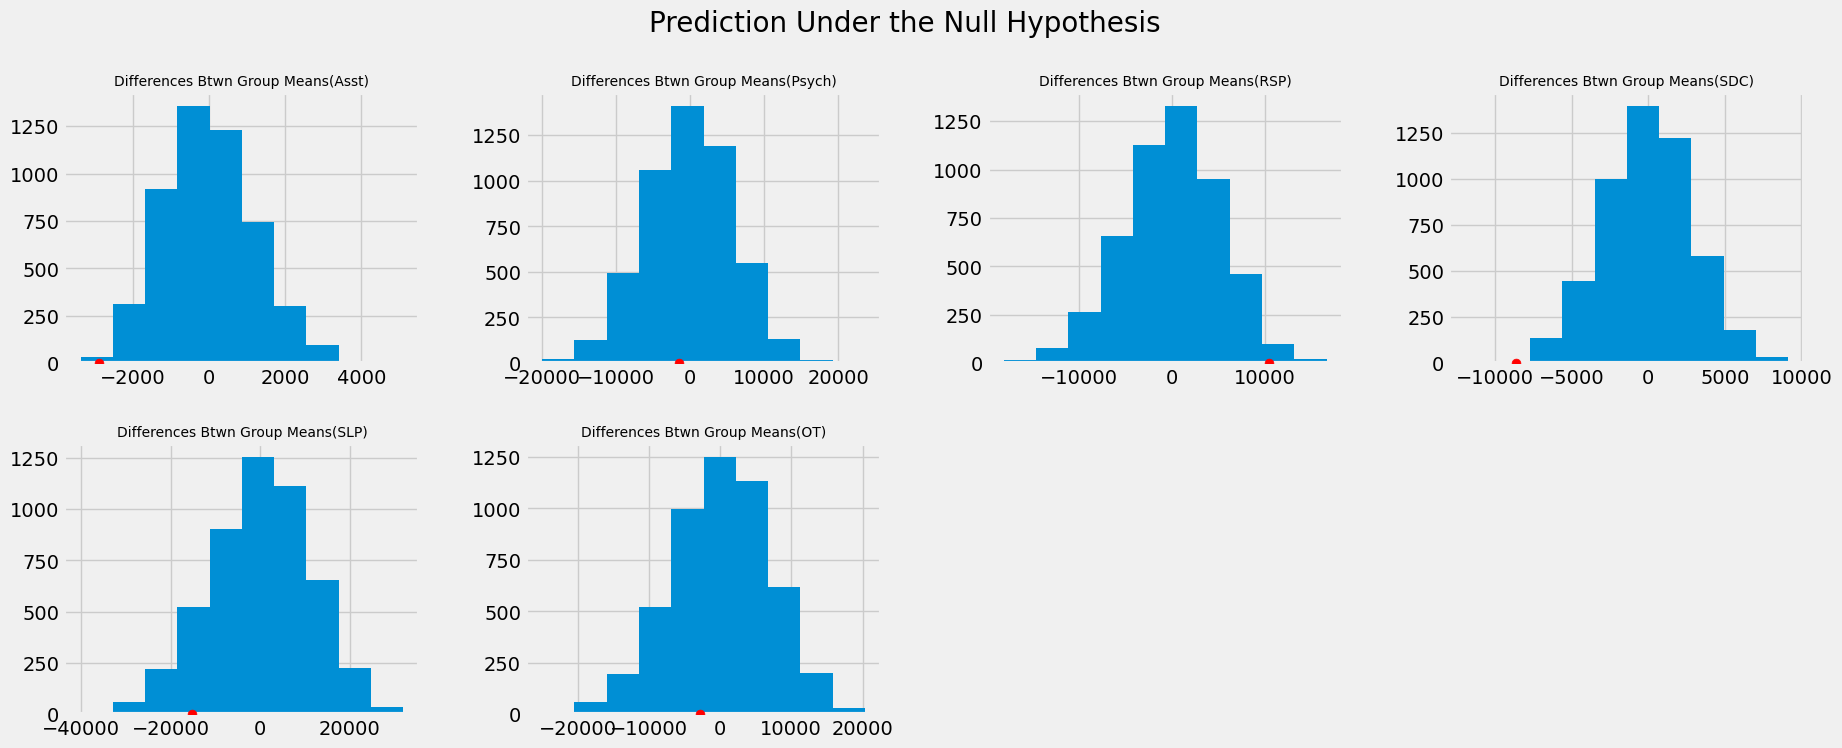

In [125]:
# plot the results of the A/B tests for each job category btwn PUSD and non-PUSD districts (averaged)

plots.figure(figsize=(20,12))
plots.subplots_adjust(hspace=0.5, wspace=0.5)
plots.suptitle("Prediction Under the Null Hypothesis", fontsize=20, y=0.95)

for j in range(len(sim_diffs_for_job_title)):
  # add a new subplot iteratively
  ax = plots.subplot(3, 4, j+1)
  job_hist_df = pd.DataFrame()
  job_hist_df[f'Differences Btwn Group Means({SpEd_team[j]})'] = sim_diffs_for_job_title[SpEd_team[j]]
  job_hist_df.hist(ax=ax)
  plots.scatter(job_conclusions[f'{SpEd_team[j]}'][0], 0, color='red', s=40, zorder=3)
  ax.title.set_size(10)


In [126]:
job_result_cols = ['Salary_Difference', 'p-value','Favors_Alt_Hyp', 'Is_Stat_Sig' ]
PUSD_v_nonPUSD_by_job_compare = pd.DataFrame.from_dict(job_conclusions, orient='index', columns=job_result_cols)
PUSD_v_nonPUSD_by_job_compare

,Salary_Difference,p-value,Favors_Alt_Hyp,Is_Stat_Sig
Asst,-2875.123602,0.0026,True,True
Psych,-1552.549337,0.3994,True,False
RSP,10397.375538,0.9846,False,True
SDC,-8633.694195,0.0020,True,True
SLP,-15336.055303,0.0898,True,False
OT,-2847.577321,0.3312,True,False


In [127]:
# determine which special education instructors have significantly lower salaries in PUSD compared to non-PUSD districts
sig_higher_than_PUSD_job = PUSD_v_nonPUSD_by_job_compare.loc[(PUSD_v_nonPUSD_by_job_compare.Favors_Alt_Hyp == True) & (PUSD_v_nonPUSD_by_job_compare.Is_Stat_Sig == True)].index.tolist()
sig_higher_than_PUSD_job

['Asst', 'SDC']

In [128]:
# determine which special education instructors have significantly higher salaries in PUSD compared to non-PUSD districts
sig_lower_than_PUSD_job = PUSD_v_nonPUSD_by_job_compare.loc[(PUSD_v_nonPUSD_by_job_compare.Favors_Alt_Hyp == False) & (PUSD_v_nonPUSD_by_job_compare.Is_Stat_Sig == True)].index.tolist()
sig_lower_than_PUSD_job

['RSP']

From our analysis, we can see that Assistants/Aides/Interns and SDC teachers are paid significantly less in Pasadena USD compared to their counterparts in non-Pasadena districts. However, we also see that RSP teachers in Pasadena are paid significantly more than RSP teachers in the neighboring districts.

**Data Cleaning Process**

* Included only the 10 closest school districts to Pasadena USD in location and size

* Investigated only the following special education job positions: Psychologists, Assistants/Aides, Resource Specialist (RSP) teachers, Special Day Class (SDC) teachers, Speech-Language Pathologists (SLP), and Occupational Therapists (OT). 

* Excluded salaries lower than a yearly salary on minimum wage

* (Part 3 only) Excluded salaries if the job title of the Special Education instructor was too vague (e.g. 'Spec Ed Teacher' in South Pasadena USD could refer to either an RSP teacher or an SDC teacher, so it was excluded).


**Results:**

* Part 1: After organizing the data and implementing A/B testing between the average of special education instructors in Pasadena school district and the average across comparable neighboring school districts, we found that the salaries in Pasadena are significantly lower. 

* Part 2: Using the same methodology for Part 1, we found that special education salaries are significantly lower in Pasadena USD when comparing to Glendale USD and Azusa USD. However, Pasadena USD salaries in special education are significantly higher than those in Arcadia USD, San Gabriel USD, and La Canada USD.

* Part 3: We applied the same methodology in the previous parts of this study to investigate if there salary differences between Pasadena USD and non-Pasadena USD districts for each special education team member (e.g. Psychologist, SLP, SDC teacher, etc.). Results indicated that RSP teachers in Pasadena USD have significantly higher salaries than those in neighboring districts, whereas Assistants/Aides and SDC teachers have significantly lower salaries.

**Conclusions, Caveats & Further Directions:**

* Overall, the claims of Pasadena USD protestors are supported with the findings that the average PUSD special education instructor salary is significantly less than the average special education salary in neighboring districts. More specifically, PUSD salaries are significantly less than those in Glendale USD and Azusa USD. Furthermore, SDC teachers and assistants were found to have significantly lower salaries in PUSD compared to other districts. 

* In the second part of the study, we found that the districts that have salaries significantly lower than Pasadena USD are Arcadia USD (AUSD), San Gabriel USD (SGUSD), and La Canada USD (LCUSD). These results should be interpreted with caution, because our final dataset did not include any salaries for RSP and SDC teachers in AUSD or in SGUSD since their salaries were combined with General Education teacher salaries which were completely excluded from this dataset.

* The results in the third part of the study should be interpreted with the caveats that: the dataset was incomplete for some of the districts (specifically AUSD and SGUSD missing RSP and SDC teachers, Azusa USD was missing SLP and OT positions) and some assumptions were made when categorizing the jobs (e.g. 'Clsrm Tchr (Spe' was assumed to be a Special Day Class teacher).

* In the article, Gardner made the claim that Pasadena USD has "had dozens of teachers just leaving even since the beginning of this year". Perhaps the discrepancy between our results and the statements of PUSD educators is due to the fact that this analysis was based on a dataset with the minimum salary of an individual who worked the entire year. If Gardner's claims are true, it would make sense that the Pasadena USD salaries on average would be lower compared to neighboring districts, since there would be a large number of short-term salaries which are generally lower than full-time salaries. At the time of this analysis, 2022 salary was not available for all of the districts of interest. Future investigations can look into the turnover rates between PUSD and non-PUSD districts by comparing the list of employees in 2021 and those in 2022.
